In [1]:
import os
import importlib

import Custom_CNN
importlib.reload(Custom_CNN)
from Custom_CNN import CropDiseaseCNN

import Classification
importlib.reload(Classification)
from Classification import Run_Classification

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
import numpy as np

In [2]:
BASE_SPLIT_PATH = r"C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Final_Split_Dataset+Generated"
TRAIN_DIR = os.path.join(BASE_SPLIT_PATH, 'Filtered_Train')
VAL_DIR = os.path.join(BASE_SPLIT_PATH, 'Filtered_Validation')
OUTPUT_DIR = "Results\Balanced_Results"

BATCH_SIZE = 64
LR = 0.001
WORKERS = 4
EPOCHS = 10
IMG_SIZE = 64
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Training Pro-Baseline on: {DEVICE}")

Training Pro-Baseline on: cuda


<>:4: SyntaxWarning: invalid escape sequence '\B'
<>:4: SyntaxWarning: invalid escape sequence '\B'
C:\Users\azeem\AppData\Local\Temp\ipykernel_35488\1320526029.py:4: SyntaxWarning: invalid escape sequence '\B'
  OUTPUT_DIR = "Results\Balanced_Results"


In [3]:
torch.manual_seed(42)
np.random.seed(42)

In [4]:
model = CropDiseaseCNN(num_classes=38).to(DEVICE)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

D:\Anaconda_Distribution\envs\ml_gpu\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [5]:
print(model)

CropDiseaseCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=38, bias=True)
)


In [6]:
summary(model, input_size=(BATCH_SIZE, 3, IMG_SIZE, IMG_SIZE))

Layer (type:depth-idx)                   Output Shape              Param #
CropDiseaseCNN                           [64, 38]                  --
├─Conv2d: 1-1                            [64, 32, 64, 64]          896
├─BatchNorm2d: 1-2                       [64, 32, 64, 64]          64
├─MaxPool2d: 1-3                         [64, 32, 32, 32]          --
├─Conv2d: 1-4                            [64, 64, 32, 32]          18,496
├─BatchNorm2d: 1-5                       [64, 64, 32, 32]          128
├─MaxPool2d: 1-6                         [64, 64, 16, 16]          --
├─Conv2d: 1-7                            [64, 128, 16, 16]         73,856
├─BatchNorm2d: 1-8                       [64, 128, 16, 16]         256
├─MaxPool2d: 1-9                         [64, 128, 8, 8]           --
├─Conv2d: 1-10                           [64, 256, 8, 8]           295,168
├─BatchNorm2d: 1-11                      [64, 256, 8, 8]           512
├─MaxPool2d: 1-12                        [64, 256, 4, 4]           -

✅ Dataset Loaded: 70476 training images.

--- Starting Advanced Training ---
Epoch 1/10


  train Loss: 1.9550 Acc: 0.5853


  val Loss: 1.2403 Acc: 0.8531
Epoch 2/10


  train Loss: 1.3804 Acc: 0.8135


  val Loss: 1.1612 Acc: 0.8700
Epoch 3/10


  train Loss: 1.2258 Acc: 0.8742


  val Loss: 0.9700 Acc: 0.9444
Epoch 4/10


  train Loss: 1.1408 Acc: 0.9071


  val Loss: 0.9599 Acc: 0.9453
Epoch 5/10


  train Loss: 1.0896 Acc: 0.9236


  val Loss: 0.8904 Acc: 0.9669
Epoch 6/10


  train Loss: 1.0537 Acc: 0.9349


  val Loss: 0.8761 Acc: 0.9686
Epoch 7/10


  train Loss: 1.0234 Acc: 0.9446


  val Loss: 0.8703 Acc: 0.9692
Epoch 8/10


  train Loss: 0.9999 Acc: 0.9527


  val Loss: 0.8533 Acc: 0.9746
Epoch 9/10


  train Loss: 0.9812 Acc: 0.9580


  val Loss: 0.8321 Acc: 0.9804
Epoch 10/10


  train Loss: 0.9582 Acc: 0.9649


  val Loss: 0.8204 Acc: 0.9819

Best Val Acc: 0.9819

📊 Generating Comprehensive Report...
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.99      0.99       252
                                 Apple___Black_rot       0.99      1.00      0.99       249
                          Apple___Cedar_apple_rust       0.99      1.00      1.00       220
                                   Apple___healthy       0.98      1.00      0.99       251
                               Blueberry___healthy       1.00      0.99      0.99       227
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       211
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       228
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.98      0.95       290
                       Corn_(maize)___Common_rust_       1.00      0.99      0.9

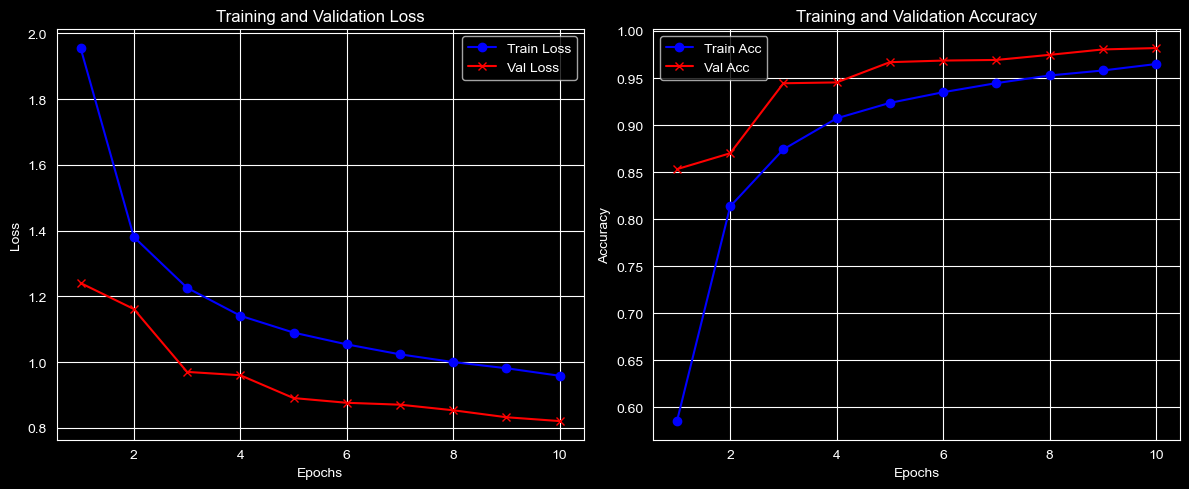

In [7]:
Run_Classification(IMG_SIZE,TRAIN_DIR,VAL_DIR,WORKERS,BATCH_SIZE,model,EPOCHS,DEVICE,optimizer, criterion,OUTPUT_DIR,scheduler)